### Mini Project --- Earthquake

# Clustering data
Dataset from drivendata : **"Earthquake Damage Prediction"**  
Source: https://www.drivendata.org/competitions/57/nepal-earthquake/data/ (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [15]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Data Visualization

In [55]:
Data = pd.read_csv('train_values.csv')
Data.head()
#importing the "train_values.csv" data that was downloaded

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [56]:
Labels = pd.read_csv('train_labels.csv')
Labels.head()
#importing the "train_labels.csv" data that was downloaded

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [57]:
predictorlist = pd.DataFrame(Data[["age","count_floors_pre_eq","height_percentage","area_percentage"]])

damage_grade = pd.DataFrame(Labels["damage_grade"]) 


<AxesSubplot:>

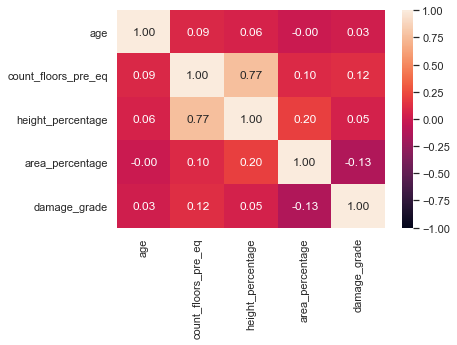

In [58]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([predictorlist, damage_grade], axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Model Generation Using Random Forest

In [16]:
raw_data = pd.read_csv('train_values.csv')
##setting building_id as the index for easy referencing
raw_data = raw_data.set_index('building_id')
y_train = pd.read_csv('train_labels.csv')
y_train = y_train.set_index('building_id')
y_train.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


#### Reading up the data types so we are able to sort it out in terms of categorial, numerical data

In [17]:
raw_data.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#### Checking for the number of values to ensure that there is no missing data

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

#### Damage_score calculations

In [19]:
variables_dropped = ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id', 'legal_ownership_status',
                    'count_families', 'has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']
score_calculation = pd.DataFrame(raw_data.drop(variables_dropped, axis=1))
## Converting remaining data as a category type data
#score_calculation = score_calculation.astype('category')
score_calculation.head()


,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2,30,6,5,t,r,n,f,q,t,...,1,0,0,0,0,0,0,0,0,0
28830,2,10,8,7,o,r,n,x,q,s,...,1,0,0,0,0,0,0,0,0,0
94947,2,10,5,5,t,r,n,f,x,t,...,1,0,0,0,0,0,0,0,0,0
590882,2,10,6,5,t,r,n,f,x,s,...,1,0,0,0,0,1,1,0,0,0
201944,3,30,8,9,t,r,n,f,x,s,...,0,0,0,0,0,0,0,0,0,0


### Converting the cateogrical into a rubricks, trying out for the variavle age

Ratioanle of this scoring system:
1. Assuming an equal earthquake throughout, a younger building , lower ```age``` will actually have a lower chance of it collapse, so the score it will get
2. Score a higher score system will mean it will have complete destruction given the fact that there is weaker
3. Summary: Lower Score ==  Stronger, higher score ==  Weaker

In [20]:
## Setting up of conditions for sorting, 10 grading system
#, 'count_floors_pre_eq', 'area_percentage','height_percentage']

    
age_conditions = [(score_calculation['age'] <= 20),
              (score_calculation['age'] <= 40) & (score_calculation['age'] > 20),
              (score_calculation['age'] <= 60) & (score_calculation['age'] > 40),
              (score_calculation['age'] <= 80) & (score_calculation['age'] > 60),
              (score_calculation['age'] <= 100) & (score_calculation['age'] > 80),
              (score_calculation['age'] <= 120) & (score_calculation['age'] > 100),
              (score_calculation['age'] <= 140) & (score_calculation['age'] > 120),
              (score_calculation['age'] <= 160) & (score_calculation['age'] > 140),
              (score_calculation['age'] <= 180) & (score_calculation['age'] > 160),
              (score_calculation['age'] <= 200) & (score_calculation['age'] > 180)]
age_score = [1,2,3,4,5,6,7,8,9,10]

count_floors_pre_eq_conditions = [(score_calculation['count_floors_pre_eq'] == 1),
                   (score_calculation['count_floors_pre_eq'] == 2),
                   (score_calculation['count_floors_pre_eq'] == 3),
                   (score_calculation['count_floors_pre_eq'] == 4),
                   (score_calculation['count_floors_pre_eq'] == 5),
                   (score_calculation['count_floors_pre_eq'] == 6),
                   (score_calculation['count_floors_pre_eq'] == 7),
                   (score_calculation['count_floors_pre_eq'] == 8),
                   (score_calculation['count_floors_pre_eq'] == 9)]
count_floors_pre_eq_score = [1,2,3,4,5,6,7,8,9]

area_percentage_score = [10,9,8,7,6,5,4,3,2,1]
area_percentage_conditions = [(score_calculation['area_percentage'] <=5),
                   (score_calculation['area_percentage'] <= 10) & (score_calculation['area_percentage'] >5),
                   (score_calculation['area_percentage'] <= 15) & (score_calculation['area_percentage'] >10),
                   (score_calculation['area_percentage'] <= 20) & (score_calculation['area_percentage'] >15),
                   (score_calculation['area_percentage'] <= 25) & (score_calculation['area_percentage'] >20),
                   (score_calculation['area_percentage'] <= 30) & (score_calculation['area_percentage'] >25),
                   (score_calculation['area_percentage'] <= 35) & (score_calculation['area_percentage'] >30),
                   (score_calculation['area_percentage'] <= 40) & (score_calculation['area_percentage'] >35),
                   (score_calculation['area_percentage'] <= 45) & (score_calculation['area_percentage'] >40),
                   (score_calculation['area_percentage'] <= 50) & (score_calculation['area_percentage'] >45)]

height_percentage_score = [1,2,3,4,5,6,7,8,9,10]
height_percentage_conditions = [(score_calculation['height_percentage'] <=3),
                     (score_calculation['height_percentage'] <= 6) & (score_calculation['height_percentage'] >3),
                     (score_calculation['height_percentage'] <= 9) & (score_calculation['height_percentage'] >6),
                     (score_calculation['height_percentage'] <= 12) & (score_calculation['height_percentage'] >9),
                     (score_calculation['height_percentage'] <= 15) & (score_calculation['height_percentage'] >12),
                     (score_calculation['height_percentage'] <= 18) & (score_calculation['height_percentage'] >15),
                     (score_calculation['height_percentage'] <= 21) & (score_calculation['height_percentage'] >18),
                     (score_calculation['height_percentage'] <= 24) & (score_calculation['height_percentage'] >21),
                     (score_calculation['height_percentage'] <= 27) & (score_calculation['height_percentage'] >24),
                     (score_calculation['height_percentage'] <= 31) & (score_calculation['height_percentage'] >27),]

original_columns= ['age','count_floors_pre_eq','area_percentage','height_percentage']
column_variables= ['age_score','count_floors_pre_eq_score','area_percentage_score','height_percentage_score']
condition_variables = [age_conditions,count_floors_pre_eq_conditions,area_percentage_conditions,height_percentage_conditions]
score_variables= [age_score,count_floors_pre_eq_score,area_percentage_score,height_percentage_score]

for count in range(4) :
    score_calculation[column_variables[count]] = np.select(condition_variables[count],score_variables[count])

score_calculation['total_score'] = pd.DataFrame(score_calculation[column_variables].sum(axis=1))
x_train = pd.DataFrame(score_calculation.drop(column_variables, axis=1))
x_train = pd.DataFrame(x_train.drop(original_columns, axis=1))
x_train.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,total_score
building_id,,,,,,,,,,,,,,,,,,,
802906,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,15
28830,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,15
94947,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,15
590882,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,14
201944,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,17


### To get dummy variables and columns --  prepartion for classificaition model

###### Converting columns with category values into dummies so that random forest can handle the data

data_convert = pd.get_dummies(data_drop, columns = ['Sex','Team','Sport', 'Year'], dummy_na = False)

In [21]:
categorical_variables = ['land_surface_condition', 'foundation_type',
                         'roof_type','ground_floor_type','other_floor_type',
                         'position', 'plan_configuration']
                         
x_train_convert = pd.get_dummies(x_train, columns = categorical_variables, dummy_na=False)
x_train_convert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   has_superstructure_adobe_mud            260601 non-null  int64
 1   has_superstructure_mud_mortar_stone     260601 non-null  int64
 2   has_superstructure_stone_flag           260601 non-null  int64
 3   has_superstructure_cement_mortar_stone  260601 non-null  int64
 4   has_superstructure_mud_mortar_brick     260601 non-null  int64
 5   has_superstructure_cement_mortar_brick  260601 non-null  int64
 6   has_superstructure_timber               260601 non-null  int64
 7   has_superstructure_bamboo               260601 non-null  int64
 8   has_superstructure_rc_non_engineered    260601 non-null  int64
 9   has_superstructure_rc_engineered        260601 non-null  int64
 10  has_superstructure_other                260601 non-null  int64


#### Application of Random Forest

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 300, random_state = 200, verbose=2, max_depth = 50)

# Train the model on training data
rf.fit(x_train_convert, np.ravel(y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomForestClassifier(max_depth=50, n_estimators=300, random_state=200,
                       verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Classification Accuracy 	: 0.6380789022298456



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   19.8s finished


<AxesSubplot:>

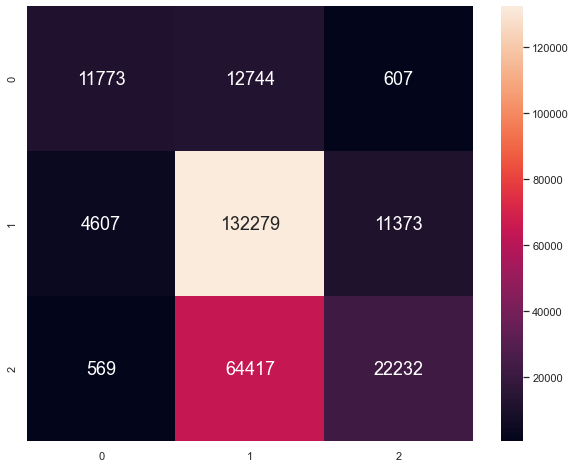

In [23]:
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(x_train_convert, np.ravel(y_train)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(figsize=(10, 8))
sb.heatmap(confusion_matrix(np.ravel(y_train), rf.predict(x_train_convert)),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [24]:
y_completed = pd.DataFrame(y_train)
y_completed['Predicted']= rf.predict(x_train_convert)
y_completed.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   19.3s finished


,damage_grade,Predicted
building_id,,
802906,3,2
28830,2,2
94947,3,3
590882,2,2
201944,3,2


In [25]:
y_completed.head(50)

,damage_grade,Predicted
building_id,,
802906,3,2
28830,2,2
94947,3,3
590882,2,2
201944,3,2
333020,2,2
728451,3,2
475515,1,2
441126,2,2


###### Weighted Analysis Calculation
We have identified that for quantifiable data, there a weighted analysis need to be implemented, reason being the fact that there are some values have heavier weightage than others, so we are using correlation to act as a wieght

In [26]:
score_calculation_weighted = pd.DataFrame(score_calculation.drop(columns= ['total_score']))
y_train_weighted = pd.read_csv('train_labels.csv')
y_train_weighted = y_train_weighted.set_index('building_id')
y_train_weighted.head()
#score_calculation_weighted.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


<AxesSubplot:>

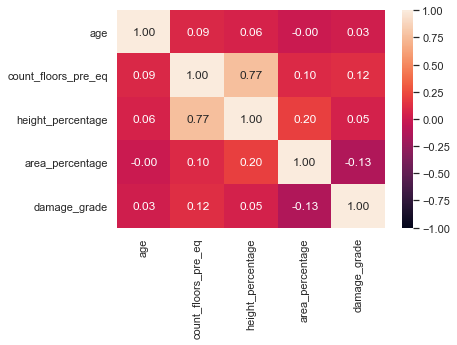

In [27]:
#### Using the values to calculate the scores
predictorlist = pd.DataFrame(score_calculation_weighted [["age","count_floors_pre_eq","height_percentage","area_percentage"]])

damage_grade = pd.DataFrame(y_train["damage_grade"]) 


jointDF = pd.concat([predictorlist.reindex(damage_grade.index), damage_grade], axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [28]:
predictorlist = pd.DataFrame(score_calculation_weighted [["age","count_floors_pre_eq","height_percentage","area_percentage"]])

damage_grade = pd.DataFrame(y_train["damage_grade"]) 

correlation=[]
alpha_value = []
weight_given = []

for var in predictorlist:
    predictor = pd.DataFrame(predictorlist[var])      
    correlation.append((predictorlist[var]).corr(y_train["damage_grade"]))
    correlation.append(var)
    alpha_value.append((predictorlist[var]).corr(y_train["damage_grade"]))
sum_of_weight = sum(alpha_value)
for position in range(len(alpha_value)):
    weight_given.append((alpha_value[position] / sum_of_weight).round(5))
    


#Values in the correlation list are the correlation value for age, count_floors_pre_eq, height_percentage and area_percentage respectively.  

In [29]:
count_weight = 0
score_columns= ['age_score','count_floors_pre_eq_score','area_percentage_score','height_percentage_score']
original_columns= ['age','count_floors_pre_eq','area_percentage','height_percentage']
total_variables_dropped = score_columns + original_columns
for score_variables in score_columns:
    score_calculation_weighted[score_variables] = score_calculation_weighted[score_variables] * weight_given[count_weight]
    count_weight+= 1
    
score_calculation_weighted['total_score'] = pd.DataFrame(score_calculation_weighted[score_columns].sum(axis=1))
score_calculation_weighted['total_score'] = pd.DataFrame(score_calculation_weighted['total_score'].round(1))
x_train_weighted = pd.DataFrame(score_calculation_weighted.drop(total_variables_dropped, axis=1))

## Converting categorical data into dummy variables
categorical_variables = ['land_surface_condition', 'foundation_type',
                         'roof_type','ground_floor_type','other_floor_type',
                         'position', 'plan_configuration']
                         
x_train_weighted_convert = pd.get_dummies(x_train_weighted, columns = categorical_variables, dummy_na=False)
x_train_weighted_convert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   has_superstructure_adobe_mud            260601 non-null  int64  
 1   has_superstructure_mud_mortar_stone     260601 non-null  int64  
 2   has_superstructure_stone_flag           260601 non-null  int64  
 3   has_superstructure_cement_mortar_stone  260601 non-null  int64  
 4   has_superstructure_mud_mortar_brick     260601 non-null  int64  
 5   has_superstructure_cement_mortar_brick  260601 non-null  int64  
 6   has_superstructure_timber               260601 non-null  int64  
 7   has_superstructure_bamboo               260601 non-null  int64  
 8   has_superstructure_rc_non_engineered    260601 non-null  int64  
 9   has_superstructure_rc_engineered        260601 non-null  int64  
 10  has_superstructure_other               

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf_weighted = RandomForestClassifier(n_estimators = 300, random_state = 200, verbose=2, max_depth = 150)

# Train the model on training data
rf_weighted.fit(x_train_weighted_convert, np.ravel(y_train_weighted))

building tree 1 of 300


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomForestClassifier(max_depth=150, n_estimators=300, random_state=200,
                       verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Goodness of Fit of Model 	Train Dataset


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   24.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Classification Accuracy 	: 0.663374277151661



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   22.2s finished


<AxesSubplot:>

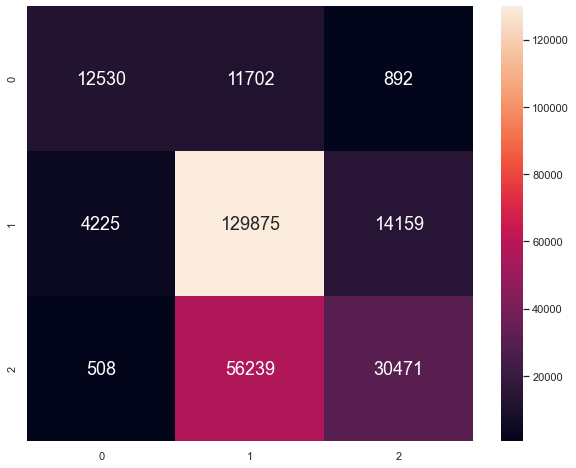

In [31]:
from sklearn.metrics import confusion_matrix

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_weighted.score(x_train_weighted_convert, np.ravel(y_train_weighted)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(figsize=(10, 8))
sb.heatmap(confusion_matrix(np.ravel(y_train_weighted), rf_weighted.predict(x_train_weighted_convert)),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [32]:
y_completed_weighted = pd.DataFrame(y_train_weighted)
y_completed_weighted['Predicted']= rf_weighted.predict(x_train_weighted_convert)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   21.4s finished


In [33]:
y_completed_weighted.head(50)

,damage_grade,Predicted
building_id,,
802906,3,2
28830,2,2
94947,3,3
590882,2,2
201944,3,2
333020,2,2
728451,3,2
475515,1,2
441126,2,2


In [34]:
raw_data_test = pd.read_csv('test_values.csv')
raw_data_test_labels = pd.DataFrame(raw_data_test['building_id'])
##setting building_id as the index for easy referencing
raw_data_test = raw_data_test.set_index('building_id')
variables_dropped = ['geo_level_1_id', 'geo_level_2_id','geo_level_3_id', 'legal_ownership_status',
                    'count_families', 'has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']

score_calculation_test = pd.DataFrame(raw_data_test.drop(variables_dropped, axis=1))
## Converting remaining data as a category type data
#score_calculation = score_calculation.astype('category')
score_calculation_test.head()


,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,3,20,7,6,t,r,n,f,q,s,...,1,0,0,0,0,0,0,0,0,0
99355,2,25,13,5,t,r,n,f,q,s,...,1,0,0,0,0,0,0,0,0,0
890251,2,5,4,5,t,r,n,f,q,s,...,1,0,0,0,0,0,0,0,0,0
745817,1,0,19,3,t,r,x,v,j,t,...,0,0,0,0,1,0,0,0,0,0
421793,3,15,8,7,t,r,q,f,q,t,...,1,0,0,0,0,0,0,0,0,0


In [35]:
## Setting up of conditions for sorting, 10 grading system
#, 'count_floors_pre_eq', 'area_percentage','height_percentage']

    
age_conditions = [(score_calculation_test['age'] <= 20),
              (score_calculation_test['age'] <= 40) & (score_calculation_test['age'] > 20),
              (score_calculation_test['age'] <= 60) & (score_calculation_test['age'] > 40),
              (score_calculation_test['age'] <= 80) & (score_calculation_test['age'] > 60),
              (score_calculation_test['age'] <= 100) & (score_calculation_test['age'] > 80),
              (score_calculation_test['age'] <= 120) & (score_calculation_test['age'] > 100),
              (score_calculation_test['age'] <= 140) & (score_calculation_test['age'] > 120),
              (score_calculation_test['age'] <= 160) & (score_calculation_test['age'] > 140),
              (score_calculation_test['age'] <= 180) & (score_calculation_test['age'] > 160),
              (score_calculation_test['age'] <= 200) & (score_calculation_test['age'] > 180)]
age_score = [1,2,3,4,5,6,7,8,9,10]

count_floors_pre_eq_conditions = [(score_calculation_test['count_floors_pre_eq'] == 1),
                   (score_calculation_test['count_floors_pre_eq'] == 2),
                   (score_calculation_test['count_floors_pre_eq'] == 3),
                   (score_calculation_test['count_floors_pre_eq'] == 4),
                   (score_calculation_test['count_floors_pre_eq'] == 5),
                   (score_calculation_test['count_floors_pre_eq'] == 6),
                   (score_calculation_test['count_floors_pre_eq'] == 7),
                   (score_calculation_test['count_floors_pre_eq'] == 8),
                   (score_calculation_test['count_floors_pre_eq'] == 9)]
count_floors_pre_eq_score = [1,2,3,4,5,6,7,8,9]

area_percentage_score = [10,9,8,7,6,5,4,3,2,1]
area_percentage_conditions = [(score_calculation_test['area_percentage'] <=5),
                   (score_calculation_test['area_percentage'] <= 10) & (score_calculation_test['area_percentage'] >5),
                   (score_calculation_test['area_percentage'] <= 15) & (score_calculation_test['area_percentage'] >10),
                   (score_calculation_test['area_percentage'] <= 20) & (score_calculation_test['area_percentage'] >15),
                   (score_calculation_test['area_percentage'] <= 25) & (score_calculation_test['area_percentage'] >20),
                   (score_calculation_test['area_percentage'] <= 30) & (score_calculation_test['area_percentage'] >25),
                   (score_calculation_test['area_percentage'] <= 35) & (score_calculation_test['area_percentage'] >30),
                   (score_calculation_test['area_percentage'] <= 40) & (score_calculation_test['area_percentage'] >35),
                   (score_calculation_test['area_percentage'] <= 45) & (score_calculation_test['area_percentage'] >40),
                   (score_calculation_test['area_percentage'] <= 50) & (score_calculation_test['area_percentage'] >45)]

height_percentage_score = [1,2,3,4,5,6,7,8,9,10]
height_percentage_conditions = [(score_calculation_test['height_percentage'] <=3),
                     (score_calculation_test['height_percentage'] <= 6) & (score_calculation_test['height_percentage'] >3),
                     (score_calculation_test['height_percentage'] <= 9) & (score_calculation_test['height_percentage'] >6),
                     (score_calculation_test['height_percentage'] <= 12) & (score_calculation_test['height_percentage'] >9),
                     (score_calculation_test['height_percentage'] <= 15) & (score_calculation_test['height_percentage'] >12),
                     (score_calculation_test['height_percentage'] <= 18) & (score_calculation_test['height_percentage'] >15),
                     (score_calculation_test['height_percentage'] <= 21) & (score_calculation_test['height_percentage'] >18),
                     (score_calculation_test['height_percentage'] <= 24) & (score_calculation_test['height_percentage'] >21),
                     (score_calculation_test['height_percentage'] <= 27) & (score_calculation_test['height_percentage'] >24),
                     (score_calculation_test['height_percentage'] <= 31) & (score_calculation_test['height_percentage'] >27),]

original_columns= ['age','count_floors_pre_eq','area_percentage','height_percentage']
score_columns= ['age_score','count_floors_pre_eq_score','area_percentage_score','height_percentage_score']
condition_variables = [age_conditions,count_floors_pre_eq_conditions,area_percentage_conditions,height_percentage_conditions]
score_variables= [age_score,count_floors_pre_eq_score,area_percentage_score,height_percentage_score]
total_variables = score_columns + original_columns

count_weight = 0
## Assigning of values

for count in range(4) :
    score_calculation_test[column_variables[count]] = np.select(condition_variables[count],score_variables[count])

for score_variables in score_columns:
    score_calculation_test[score_variables] = score_calculation_test[score_variables] * weight_given[count_weight]
    count_weight+= 1

score_calculation_test['total_score'] = pd.DataFrame(score_calculation_test[column_variables].sum(axis=1))
x_test = pd.DataFrame(score_calculation_test.drop(total_variables, axis=1))
x_test.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,total_score
building_id,,,,,,,,,,,,,,,,,,,
300051,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,7.77180
99355,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,5.87674
890251,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,6.77600
745817,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,4.87673
421793,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,6.09079


In [36]:
## Converting categorical data into dummy variables
categorical_variables = ['land_surface_condition', 'foundation_type',
                         'roof_type','ground_floor_type','other_floor_type',
                         'position', 'plan_configuration']
                         
x_test = pd.get_dummies(x_test, columns = categorical_variables, dummy_na=False)
x_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   has_superstructure_adobe_mud            86868 non-null  int64  
 1   has_superstructure_mud_mortar_stone     86868 non-null  int64  
 2   has_superstructure_stone_flag           86868 non-null  int64  
 3   has_superstructure_cement_mortar_stone  86868 non-null  int64  
 4   has_superstructure_mud_mortar_brick     86868 non-null  int64  
 5   has_superstructure_cement_mortar_brick  86868 non-null  int64  
 6   has_superstructure_timber               86868 non-null  int64  
 7   has_superstructure_bamboo               86868 non-null  int64  
 8   has_superstructure_rc_non_engineered    86868 non-null  int64  
 9   has_superstructure_rc_engineered        86868 non-null  int64  
 10  has_superstructure_other                86868 non-nu

In [37]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 300051 to 501372
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   has_superstructure_adobe_mud            86868 non-null  int64  
 1   has_superstructure_mud_mortar_stone     86868 non-null  int64  
 2   has_superstructure_stone_flag           86868 non-null  int64  
 3   has_superstructure_cement_mortar_stone  86868 non-null  int64  
 4   has_superstructure_mud_mortar_brick     86868 non-null  int64  
 5   has_superstructure_cement_mortar_brick  86868 non-null  int64  
 6   has_superstructure_timber               86868 non-null  int64  
 7   has_superstructure_bamboo               86868 non-null  int64  
 8   has_superstructure_rc_non_engineered    86868 non-null  int64  
 9   has_superstructure_rc_engineered        86868 non-null  int64  
 10  has_superstructure_other                86868 non-nu

In [38]:
y_test= pd.DataFrame(raw_data_test_labels)
#y_test = y_test.set_index('building_id')

y_test['damage_grade'] = rf_weighted.predict(x_test)
y_test.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    7.2s finished


,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [39]:
#y_test = y_test.set_index('building_id')
y_test.head(50)

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3
5,871976,3
6,691228,2
7,896100,2
8,343471,2
9,766647,2


###### Outputting to a out.csv file so we can use it as "test_labels"

In [40]:
compression_opts = dict(method='zip',
                        archive_name='out.csv') 
y_test.to_csv('out.zip', index=False, compression=compression_opts)  

## Data Prediction analysis

In [41]:
raw_data = pd.read_csv('test_values.csv')
##setting building_id as the index for easy referencing
#raw_data = raw_data.set_index('building_id')
y_train = pd.read_csv('out.csv')
#y_train = y_train.set_index('building_id')
y_train.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [42]:
geolevels = pd.DataFrame(raw_data[['building_id','geo_level_1_id']])
geolevels['damage_grade'] = y_train['damage_grade']
geolevels = geolevels.set_index('building_id')
geolevels.head()

,geo_level_1_id,damage_grade
building_id,,
300051,17,2
99355,6,2
890251,22,2
745817,26,2
421793,17,3


In [43]:
geolevelsdmg1 = geolevels.loc[geolevels['damage_grade'] == 1] 
geolevelsdmg2 = geolevels.loc[geolevels['damage_grade'] == 2] 
geolevelsdmg3 = geolevels.loc[geolevels['damage_grade'] == 3] 


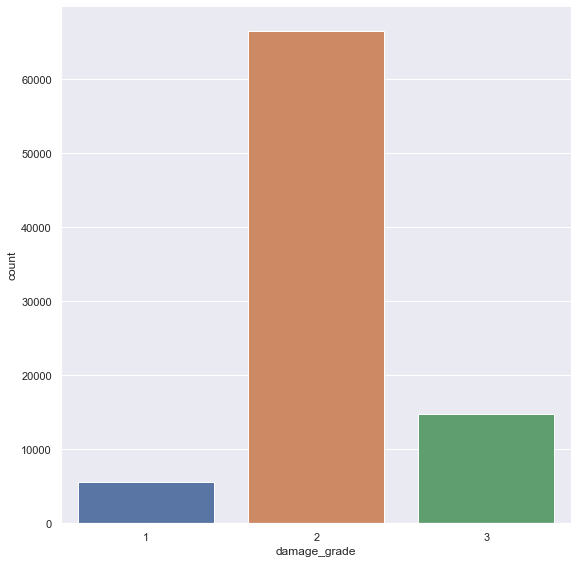

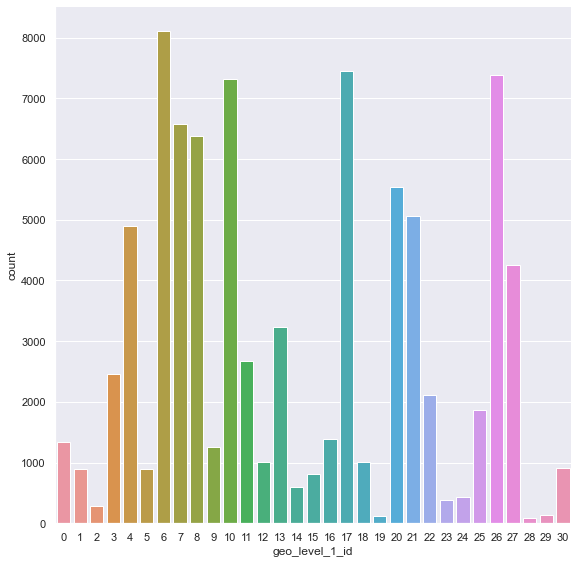

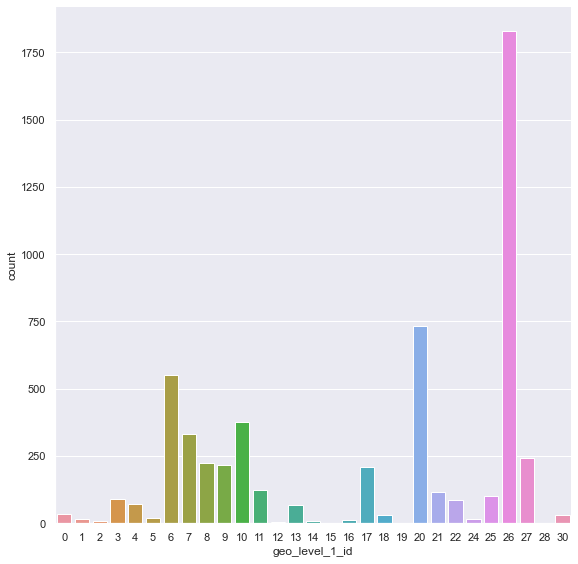

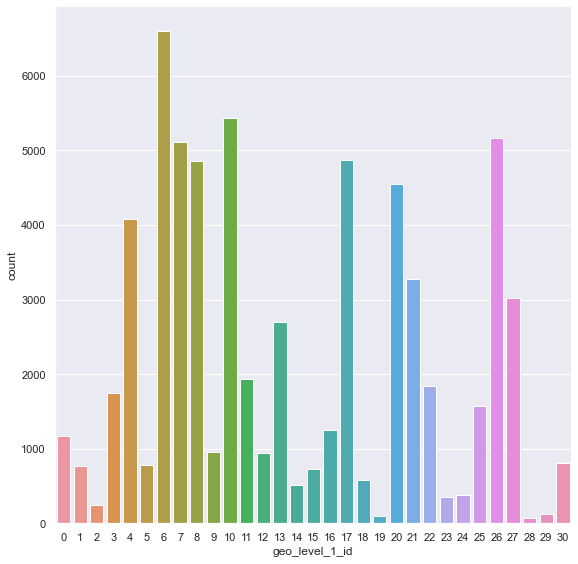

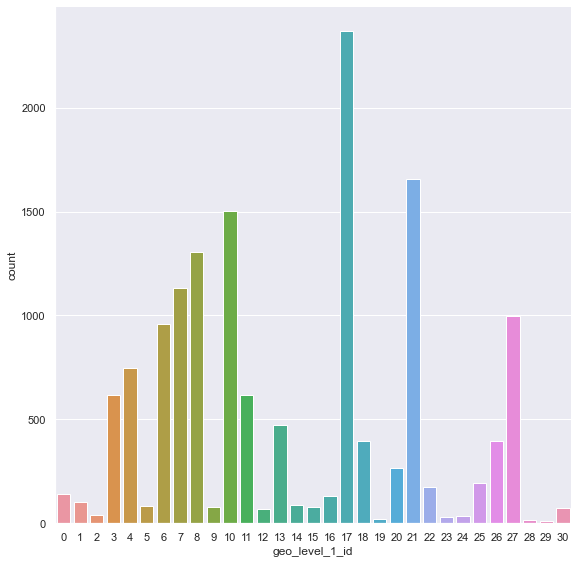

In [44]:
sb.catplot(x='damage_grade', data = geolevels, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevels, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevelsdmg1, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevelsdmg2, kind = "count", height = 8)
sb.catplot(x='geo_level_1_id', data = geolevelsdmg3, kind = "count", height = 8)
#ax = sb.swarmplot(x="damage_grade", y="geo_level_1_id", data=geolevels)
#sb.swarmplot(x = 'damage_grade', y = 'geo_level_1_id', data = geolevels)

##### Comments
The above graphs show the frequency of damage grades in each location, and there can definetly be seen a distinct trend in each of the damage grades for the test data.
Firstly, the whole country was most affected with damage grade = 2, with it being the highest proportion amongst the three.
Then the highest occurences within the 
The first point that can be noticed is that the damage grade = 2 was the most occured out of all the other others, with levelid 6 having the most occurences at 6600. The level id that was hit the hardest was 17 with the highest number of occurences in damage grade = 3, and a fairly high occurence in damage grade = 2 but very less in damage grade = 1, showing that it was quite badly hit.
Location ID 6,7,8, 10, 21,26 and 27 were all significantly affected by damage grade = 3, with all the latter having high occurences in damage grade =2, and 26 having the largest occurence for damage grade = 1

In [45]:
cols = ['geo_level_1_id', 'Average_Damage_Grade']
lst = []
for count in range(31):
    geodist = geolevels.loc[geolevels['geo_level_1_id'] == count] 
    dmg = geodist['damage_grade'].mean()
    lst.append([count,dmg])   
avgdamages = pd.DataFrame(lst, columns=cols)
avgdamages.head()


    
#sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])

,geo_level_1_id,Average_Damage_Grade
0,0,2.077951
1,1,2.100338
2,2,2.110345
3,3,2.215071
4,4,2.138537


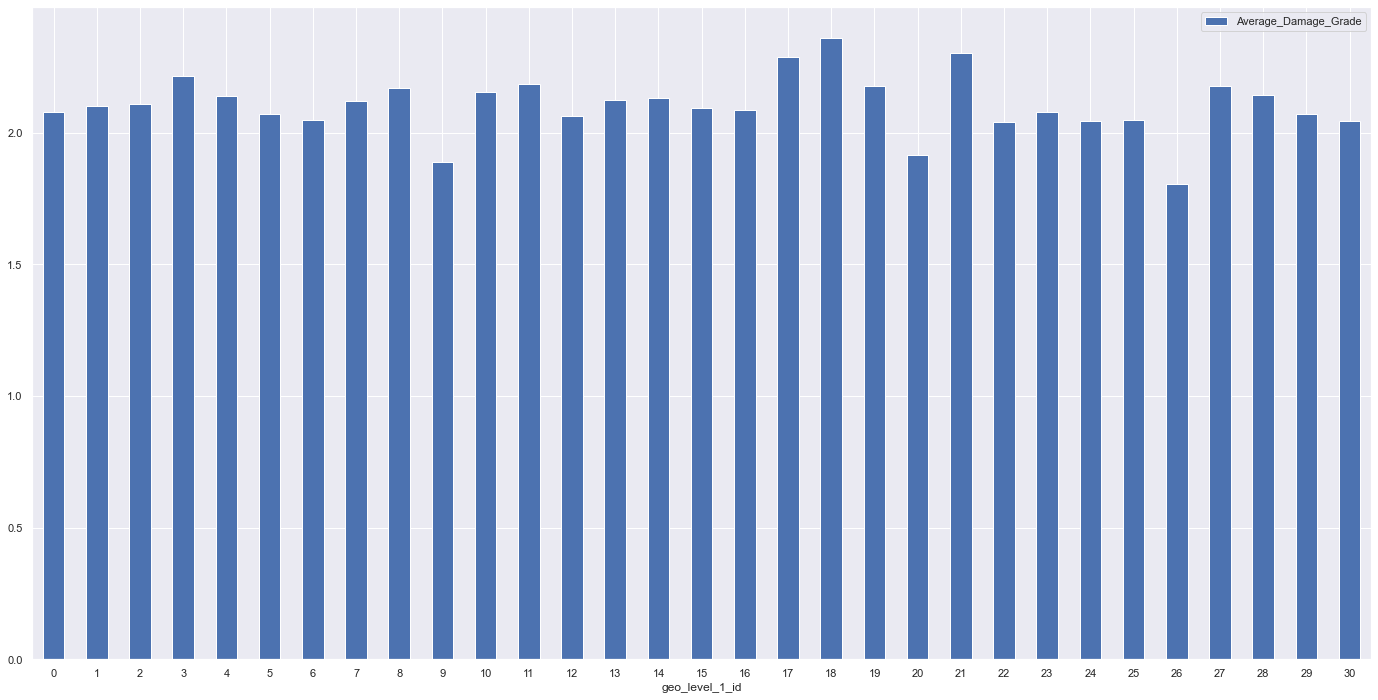

In [46]:
#sb.jointplot(df1['geo_level_1_id'], df1['Average_Damage_Grade'], height = 12)

ax = avgdamages.plot.bar(x='geo_level_1_id', y='Average_Damage_Grade', rot=0, figsize = (24,12))

###### Comments
The above graph shows the average damage grade in each location, and it correlates to the catplot before

In [47]:
industry = pd.DataFrame(raw_data[['building_id','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_hotel',
                     'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                    'has_secondary_use_industry', 'has_secondary_use_health_post','has_secondary_use_gov_office',
                    'has_secondary_use_use_police','has_secondary_use_other']])
industry['damage_grade'] = y_train['damage_grade']
industry = industry.set_index('building_id')
industry.head()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,
300051,0,0,0,0,0,0,0,0,0,0,0,2
99355,1,1,0,0,0,0,0,0,0,0,0,2
890251,0,0,0,0,0,0,0,0,0,0,0,2
745817,1,0,0,1,0,0,0,0,0,0,0,2
421793,0,0,0,0,0,0,0,0,0,0,0,3


In [48]:
has_use =industry.loc[industry['has_secondary_use'] == 1] 
coldrop = ['has_secondary_use']
has_use = pd.DataFrame(has_use.drop(coldrop, axis=1))
has_use.head()

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,
99355,1,0,0,0,0,0,0,0,0,0,2
745817,0,0,1,0,0,0,0,0,0,0,2
535718,0,0,1,0,0,0,0,0,0,0,2
37201,1,0,0,0,0,0,0,0,0,0,2
304627,0,1,0,0,0,0,0,0,0,0,1


In [49]:
alst = []
for a in has_use:
    if a == 'damage_grade':
        break
    freq = has_use[a].sum()
    colls = ['IndustryName','Freq']
    alst.append([a,freq])
freqcount = pd.DataFrame (alst, columns=colls)
freqcount.head(50)


,IndustryName,Freq
0,has_secondary_use_agriculture,5568
1,has_secondary_use_hotel,2942
2,has_secondary_use_rental,716
3,has_secondary_use_institution,88
4,has_secondary_use_school,32
5,has_secondary_use_industry,87
6,has_secondary_use_health_post,9
7,has_secondary_use_gov_office,10
8,has_secondary_use_use_police,4
9,has_secondary_use_other,426


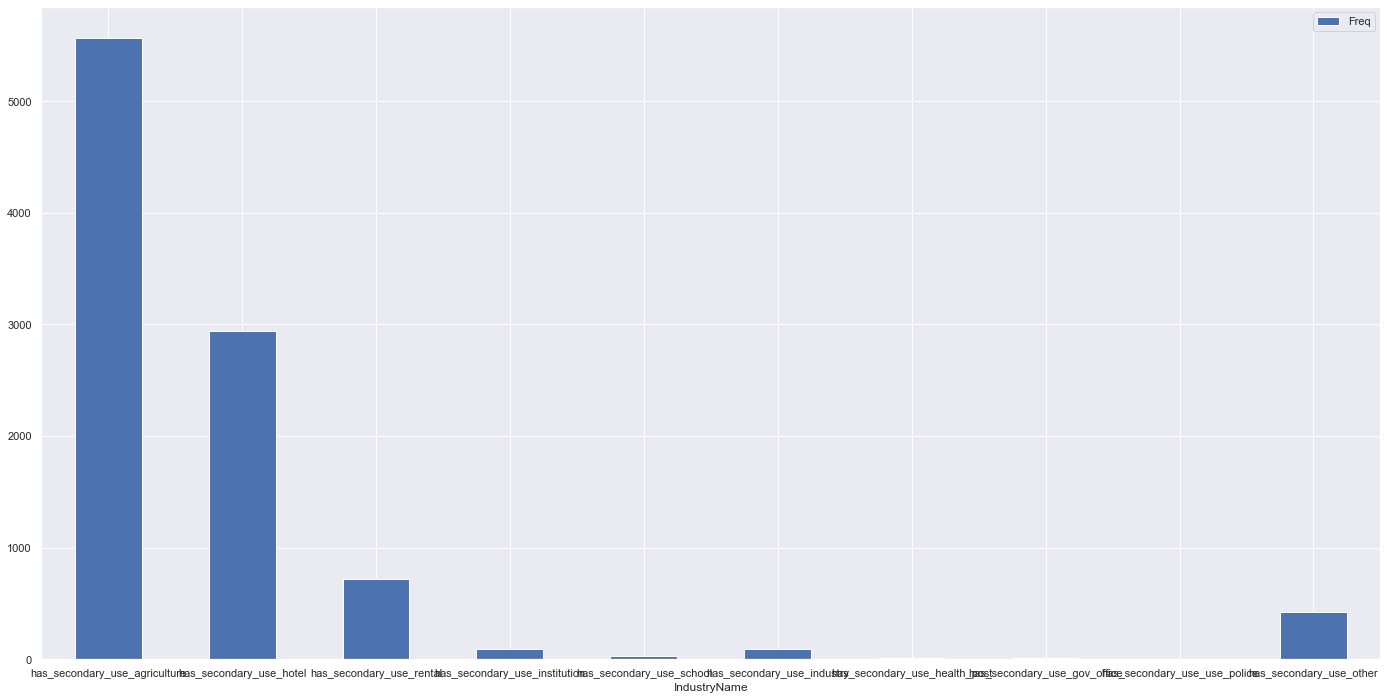

In [50]:
#BELOW SHOWS TOTAL COUNT OF EACH INDUSTRY
ax = freqcount.plot.bar(x='IndustryName', y='Freq', rot=0, figsize = (24,12))

In [51]:
industry_grade_1={'agriculture': 0,
                'hotel' :0,
                'rental':0,
                'institution' : 0,
                'school' : 0,
                'industry' :0, 
                'health_post': 0,
                'gov_office': 0,
                'police': 0,
               'other_uses' :0}

industry_grade_2={'agriculture': 0,
                'hotel' :0,
                'rental':0,
                'institution' : 0,
                'school' : 0,
                'industry' :0, 
                'health_post': 0,
                'gov_office': 0,
                'police': 0,
               'other_uses' :0}

industry_grade_3={'agriculture': 0,
                'hotel' :0,
                'rental':0,
                'institution' : 0,
                'school' : 0,
                'industry' :0, 
                'health_post': 0,
                'gov_office': 0,
                'police': 0,
               'other_uses' :0}
industry_list = ['has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution',
                'has_secondary_use_school', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
                'has_secondary_use_use_police', 'has_secondary_use_other']

def industrial_checker(dictionary_grade,dataframe):
    count = 0 
    for i in range(len(dataframe)):
        for industry in industry_list:
            if dataframe[industry].iloc[i] == 1:
                if industry == 'has_secondary_use_agriculture':
                    dictionary_grade['agriculture'] += 1
                elif industry == 'has_secondary_use_hotel':
                    dictionary_grade['hotel'] += 1
                elif industry == 'has_secondary_use_rental':
                    dictionary_grade['rental'] += 1
                elif industry == 'has_secondary_use_institution' :
                    dictionary_grade['institution'] += 1
                elif industry == 'has_secondary_use_school':
                    dictionary_grade['school'] += 1
                elif industry == 'has_secondary_use_health_post':
                    dictionary_grade['health_post'] += 1
                elif industry == 'has_secondary_use_gov_office':
                    dictionary_grade['gov_office'] += 1
                elif industry == 'has_secondary_use_use_police':
                    dictionary_grade['police'] += 1
                else:
                    dictionary_grade['other_uses'] += 1
        count += 1
#has_use_1.head()
#print(has_use_1['has_secondary_use_agriculture'].iloc[0])
has_use_1 = pd.DataFrame(has_use[has_use['damage_grade'] == 1])
has_use_2 = pd.DataFrame(has_use[has_use['damage_grade'] == 2])
has_use_3 = pd.DataFrame(has_use[has_use['damage_grade'] == 3])
industrial_checker(industry_grade_1,has_use_1)
industrial_checker(industry_grade_2,has_use_2)
industrial_checker(industry_grade_3,has_use_3)

dict_list = [industry_grade_1,industry_grade_2,industry_grade_3]
counter= 1

for dictonary_call_out in dict_list:
    print('The Sectors being hit with damage {}'.format(counter))
    print(dictonary_call_out, '\n')
    counter += 1
               

The Sectors being hit with damage 1
{'agriculture': 138, 'hotel': 756, 'rental': 288, 'institution': 41, 'school': 11, 'industry': 0, 'health_post': 3, 'gov_office': 6, 'police': 1, 'other_uses': 35} 

The Sectors being hit with damage 2
{'agriculture': 4389, 'hotel': 1850, 'rental': 377, 'institution': 38, 'school': 18, 'industry': 0, 'health_post': 6, 'gov_office': 4, 'police': 1, 'other_uses': 318} 

The Sectors being hit with damage 3
{'agriculture': 1041, 'hotel': 336, 'rental': 51, 'institution': 9, 'school': 3, 'industry': 0, 'health_post': 0, 'gov_office': 0, 'police': 2, 'other_uses': 73} 



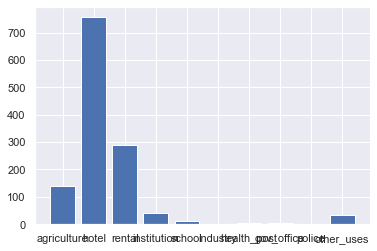

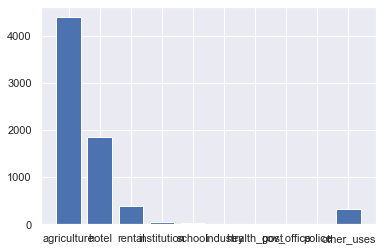

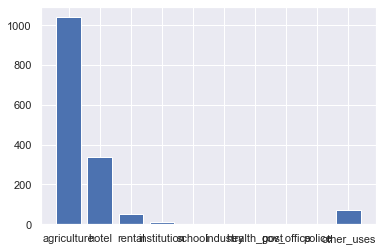

In [52]:
for dictonary_call_out in dict_list:
    plt.bar(*zip(*dictonary_call_out.items()))
    plt.show()

In [53]:
lst = []
for x in has_use:
    if x == 'damage_grade':
        break
    boolean = has_use.loc[has_use[x] == 1] 
    dmg = boolean['damage_grade'].mean()
    cols = ['Industry_Name', 'Average_Damage_Grade']
    lst.append([x,dmg]) 
avgdamages = pd.DataFrame(lst, columns=cols)
avgdamages.head() 

        
        


,Industry_Name,Average_Damage_Grade
0,has_secondary_use_agriculture,2.162177
1,has_secondary_use_hotel,1.857240
2,has_secondary_use_rental,1.668994
3,has_secondary_use_institution,1.636364
4,has_secondary_use_school,1.750000


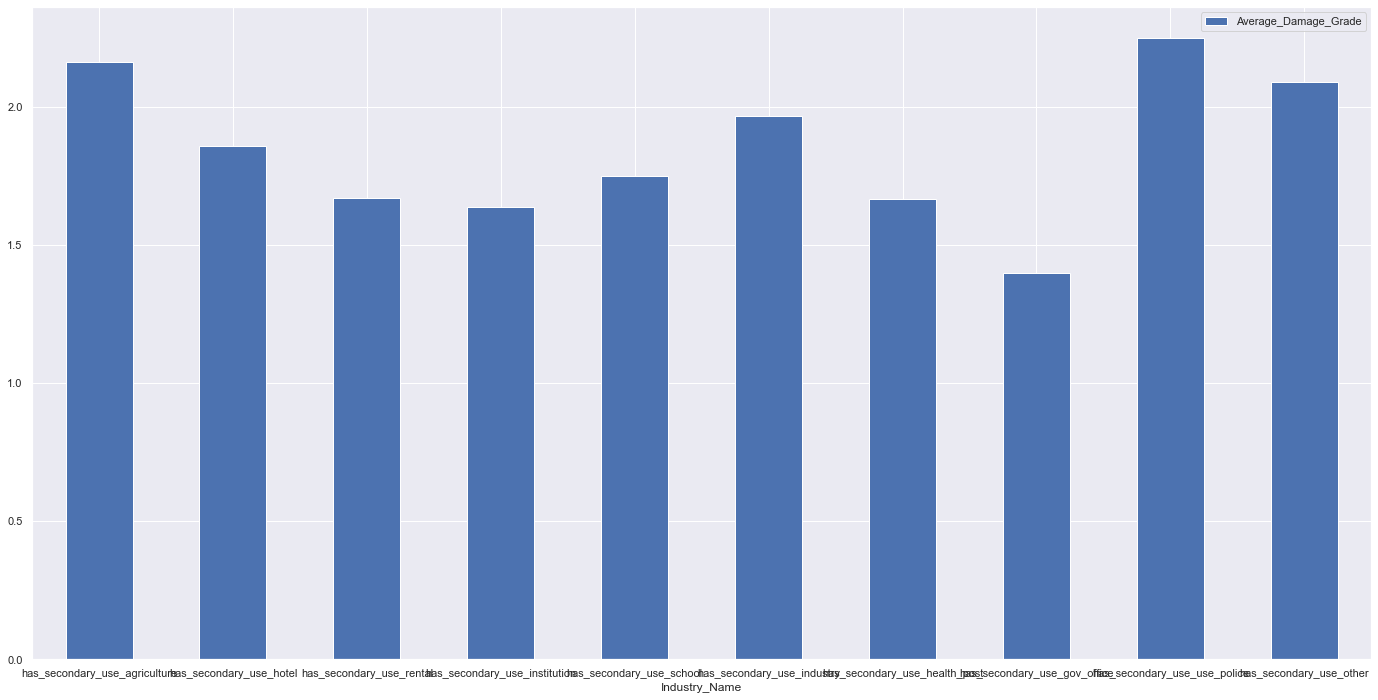

In [54]:
ax = avgdamages.plot.bar(x='Industry_Name', y='Average_Damage_Grade', rot=0, figsize = (24,12))
        